In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
data_types = pd.read_excel('data/Copy of Data Columns, Types.xlsx', engine = 'openpyxl')
data = pd.read_excel('data/StudentData - TO MODEL.xlsx', engine = 'openpyxl')
data_prediction = pd.read_excel('data/StudentEvaluation- TO PREDICT.xlsx', engine = 'openpyxl')

In [3]:
data_types

,Name,Type,MD code,Length,Measurement Type,Excluded
0,Brand Code,Double,-9999,8,General,Categorical
1,Carb Volume,Double,-9999,8,General,Auto
2,Fill Ounces,Double,-9999,8,General,Auto
3,PC Volume,Double,-9999,8,General,Auto
4,Carb Pressure,Double,-9999,8,General,Auto
5,Carb Temp,Double,-9999,8,General,Auto
6,PSC,Double,-9999,8,General,Auto
7,PSC Fill,Double,-9999,8,General,Auto
8,PSC CO2,Double,-9999,8,General,Auto
9,Mnf Flow,Double,-9999,8,General,Auto


In [4]:
data

,Brand Code,Carb Volume,Fill Ounces,PC Volume,Carb Pressure,Carb Temp,PSC,PSC Fill,PSC CO2,Mnf Flow,...,Balling,Pressure Vacuum,PH,Oxygen Filler,Bowl Setpoint,Pressure Setpoint,Air Pressurer,Alch Rel,Carb Rel,Balling Lvl
0,B,5.340000,23.966667,0.263333,68.2,141.2,0.104,0.26,0.04,-100.0,...,1.398,-4.0,8.36,0.0220,120.0,46.4,142.6,6.58,5.32,1.48
1,A,5.426667,24.006667,0.238667,68.4,139.6,0.124,0.22,0.04,-100.0,...,1.498,-4.0,8.26,0.0260,120.0,46.8,143.0,6.56,5.30,1.56
2,B,5.286667,24.060000,0.263333,70.8,144.8,0.090,0.34,0.16,-100.0,...,3.142,-3.8,8.94,0.0240,120.0,46.6,142.0,7.66,5.84,3.28
3,A,5.440000,24.006667,0.293333,63.0,132.6,NaN,0.42,0.04,-100.0,...,3.042,-4.4,8.24,0.0300,120.0,46.0,146.2,7.14,5.42,3.04
4,A,5.486667,24.313333,0.111333,67.2,136.8,0.026,0.16,0.12,-100.0,...,3.042,-4.4,8.26,0.0300,120.0,46.0,146.2,7.14,5.44,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,NaN,5.500000,24.040000,0.248667,74.8,145.8,0.172,0.36,0.04,136.0,...,2.366,-5.8,8.86,0.0026,110.0,50.0,141.8,7.72,5.56,1.62
2567,NaN,5.506667,23.980000,0.254000,74.4,146.0,0.108,0.22,0.02,138.8,...,2.016,-5.6,8.88,0.0026,110.0,50.0,142.6,7.68,5.58,1.78
2568,B,5.346667,24.040000,0.280667,68.0,141.8,0.032,0.28,0.02,143.8,...,1.516,-5.6,8.68,0.0026,110.0,50.0,143.0,6.56,5.36,1.28
2569,B,5.366667,24.026667,0.264667,68.2,141.6,0.040,0.32,0.02,147.2,...,1.566,-5.4,8.56,0.0026,110.0,50.0,142.8,6.56,5.36,1.28


In [5]:
data.columns

Index(['Brand Code', 'Carb Volume', 'Fill Ounces', 'PC Volume',
       'Carb Pressure', 'Carb Temp', 'PSC', 'PSC Fill', 'PSC CO2', 'Mnf Flow',
       'Carb Pressure1', 'Fill Pressure', 'Hyd Pressure1', 'Hyd Pressure2',
       'Hyd Pressure3', 'Hyd Pressure4', 'Filler Level', 'Filler Speed',
       'Temperature', 'Usage cont', 'Carb Flow', 'Density', 'MFR', 'Balling',
       'Pressure Vacuum', 'PH', 'Oxygen Filler', 'Bowl Setpoint',
       'Pressure Setpoint', 'Air Pressurer', 'Alch Rel', 'Carb Rel',
       'Balling Lvl'],
      dtype='object')

In [6]:
##################
### TO REPLACE ###
##################

data = data.dropna(how = 'any')

##################
### TO REPLACE ###
##################

In [7]:
X = data[[x for x in data.columns if x != 'PH']]
y = data['PH']

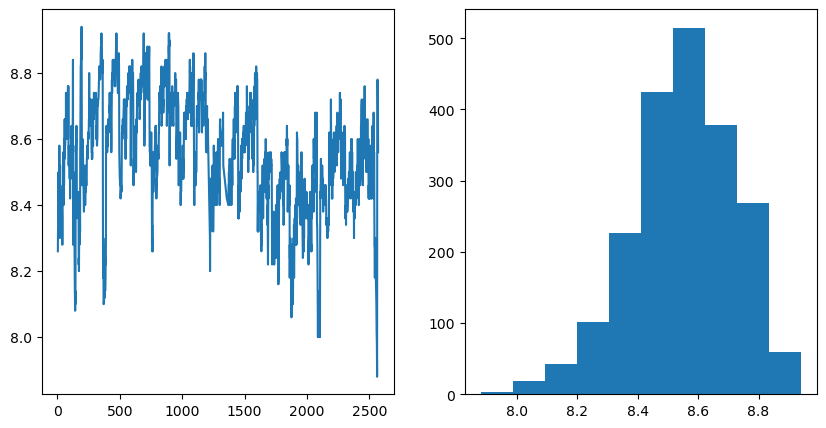

In [8]:
fig, ax = plt.subplots(1, 2, figsize = (10,5))
ax[0].plot(data['PH'])
ax[1].hist(data['PH'])
plt.show()

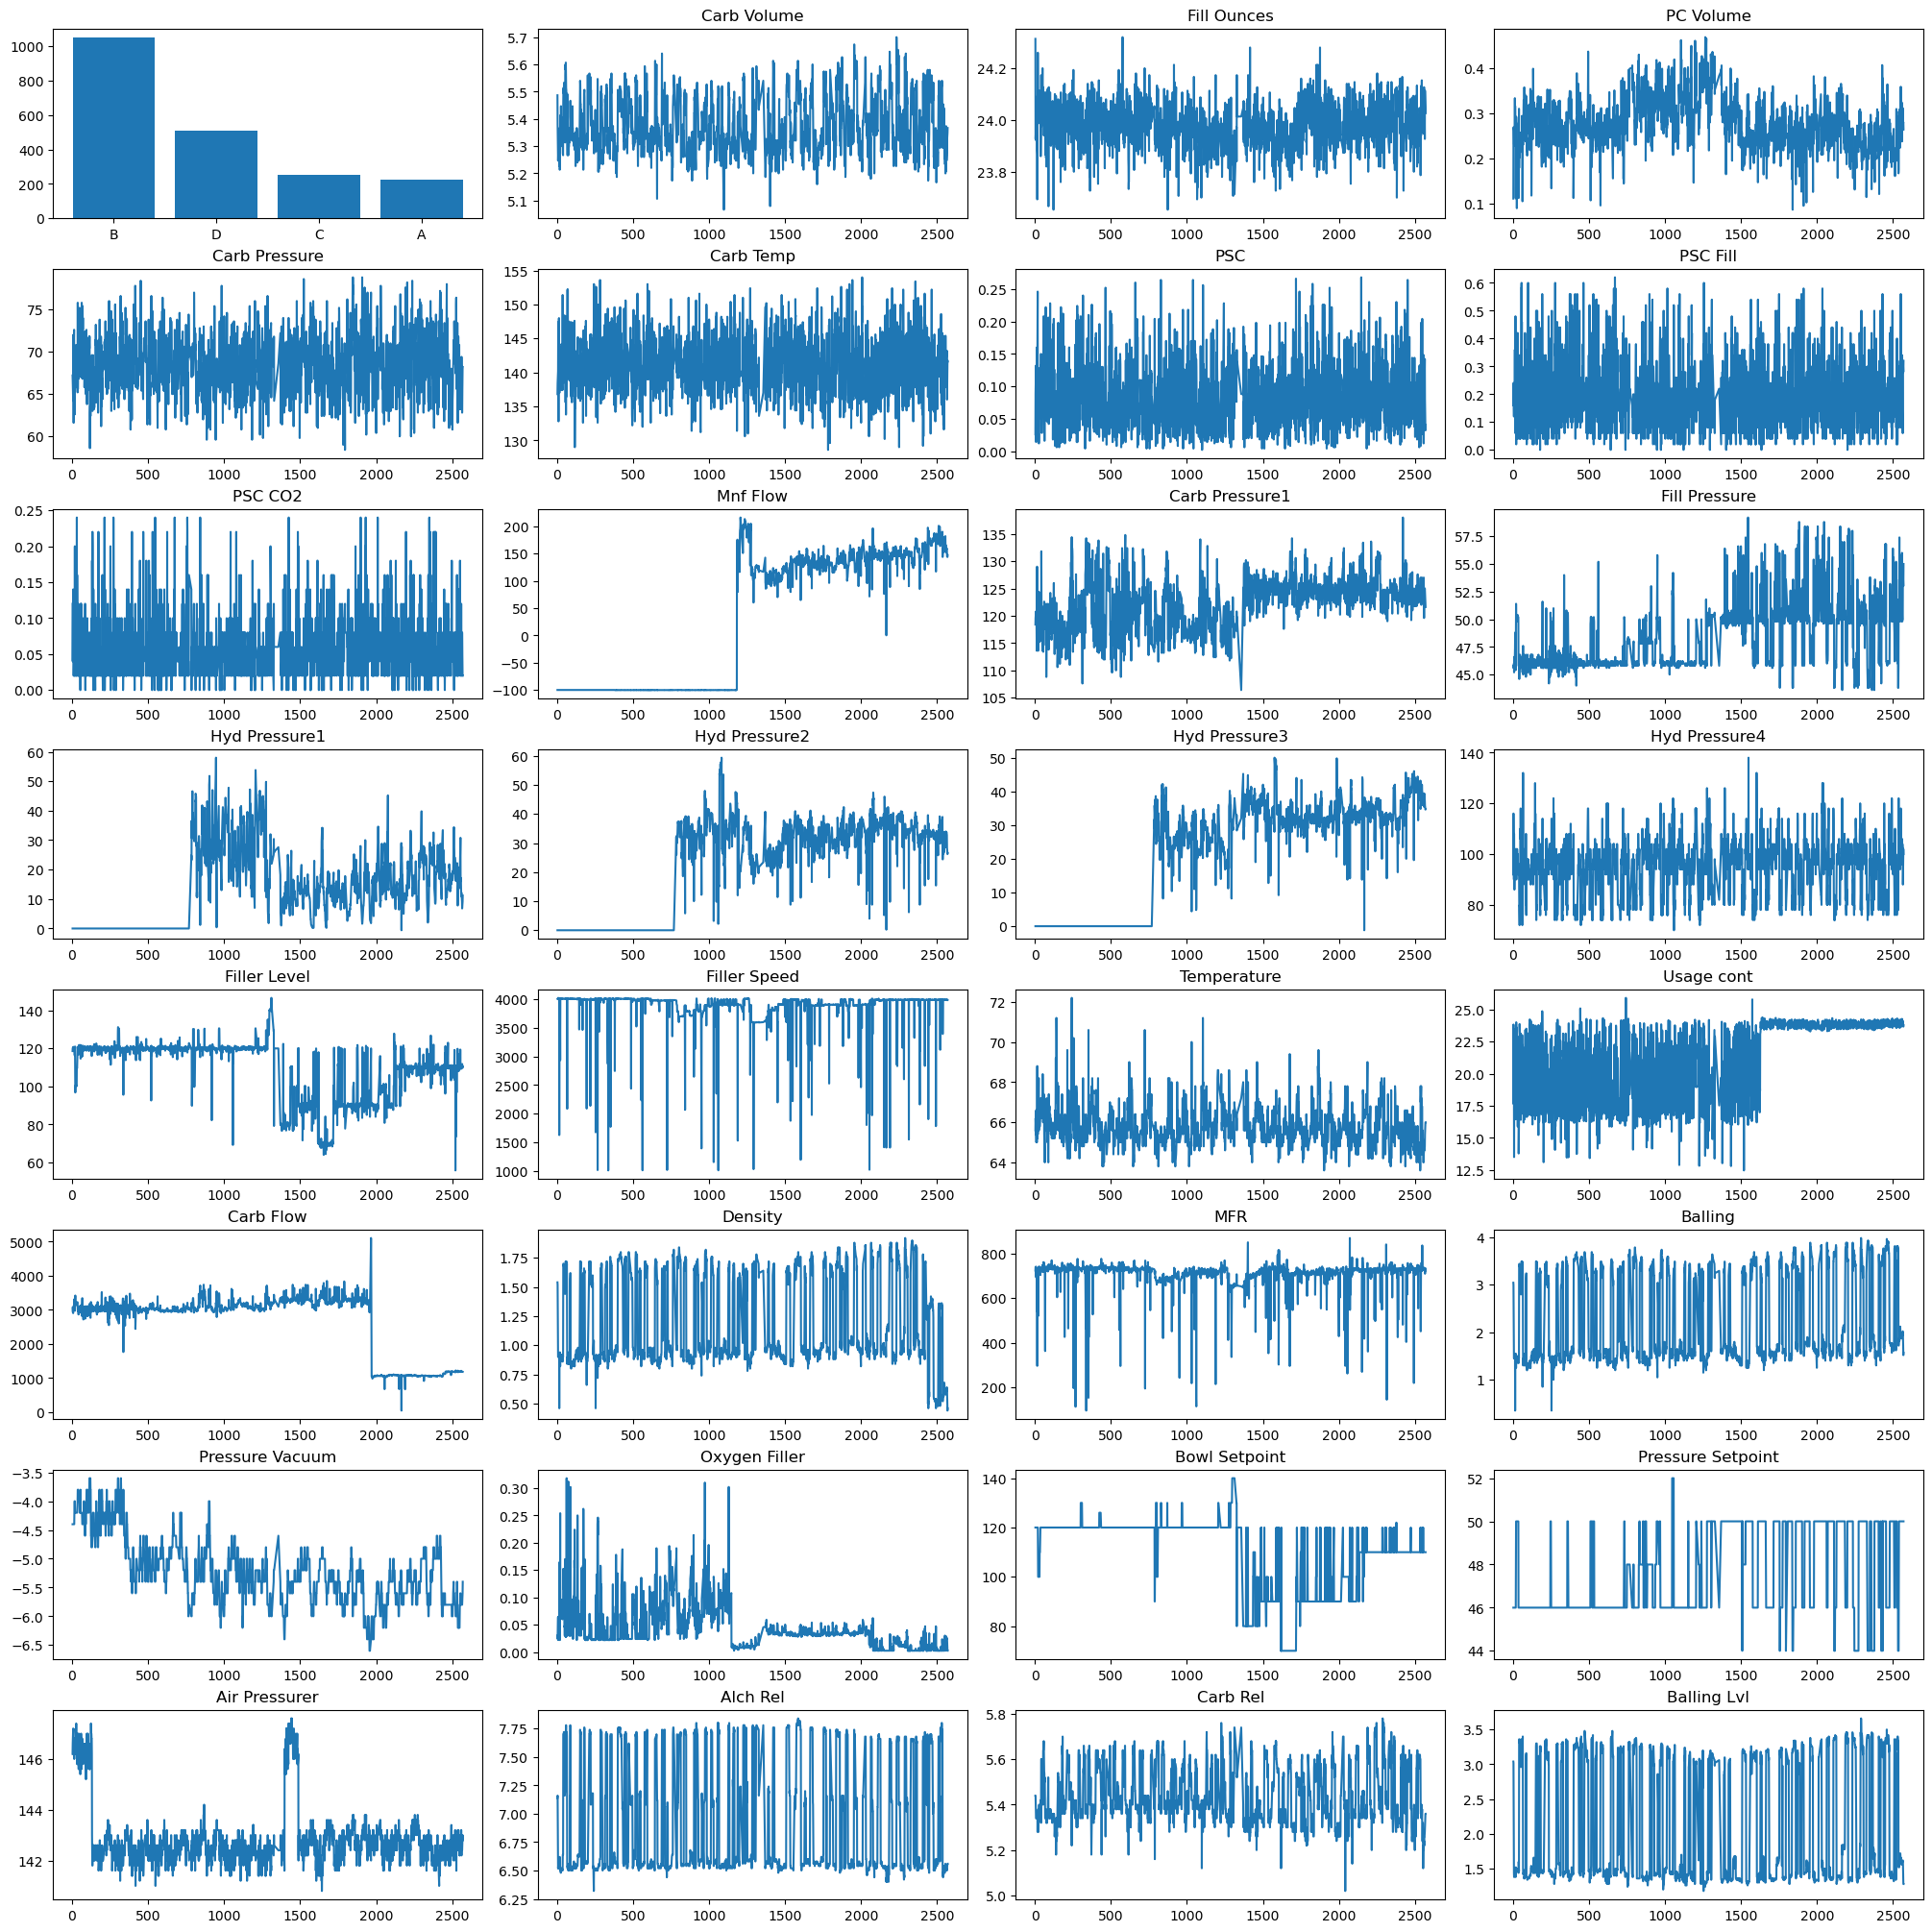

In [9]:
fig, axes = plt.subplots(8, 4, figsize = (20,20), constrained_layout = True)

for col, ax in zip(X, axes.ravel()):
    if X[col].dtype != 'float64':
        ax.bar(X[col].value_counts().index, X[col].value_counts().values)
    else:
        ax.plot(X[col])
        ax.set_title(col)

plt.show()

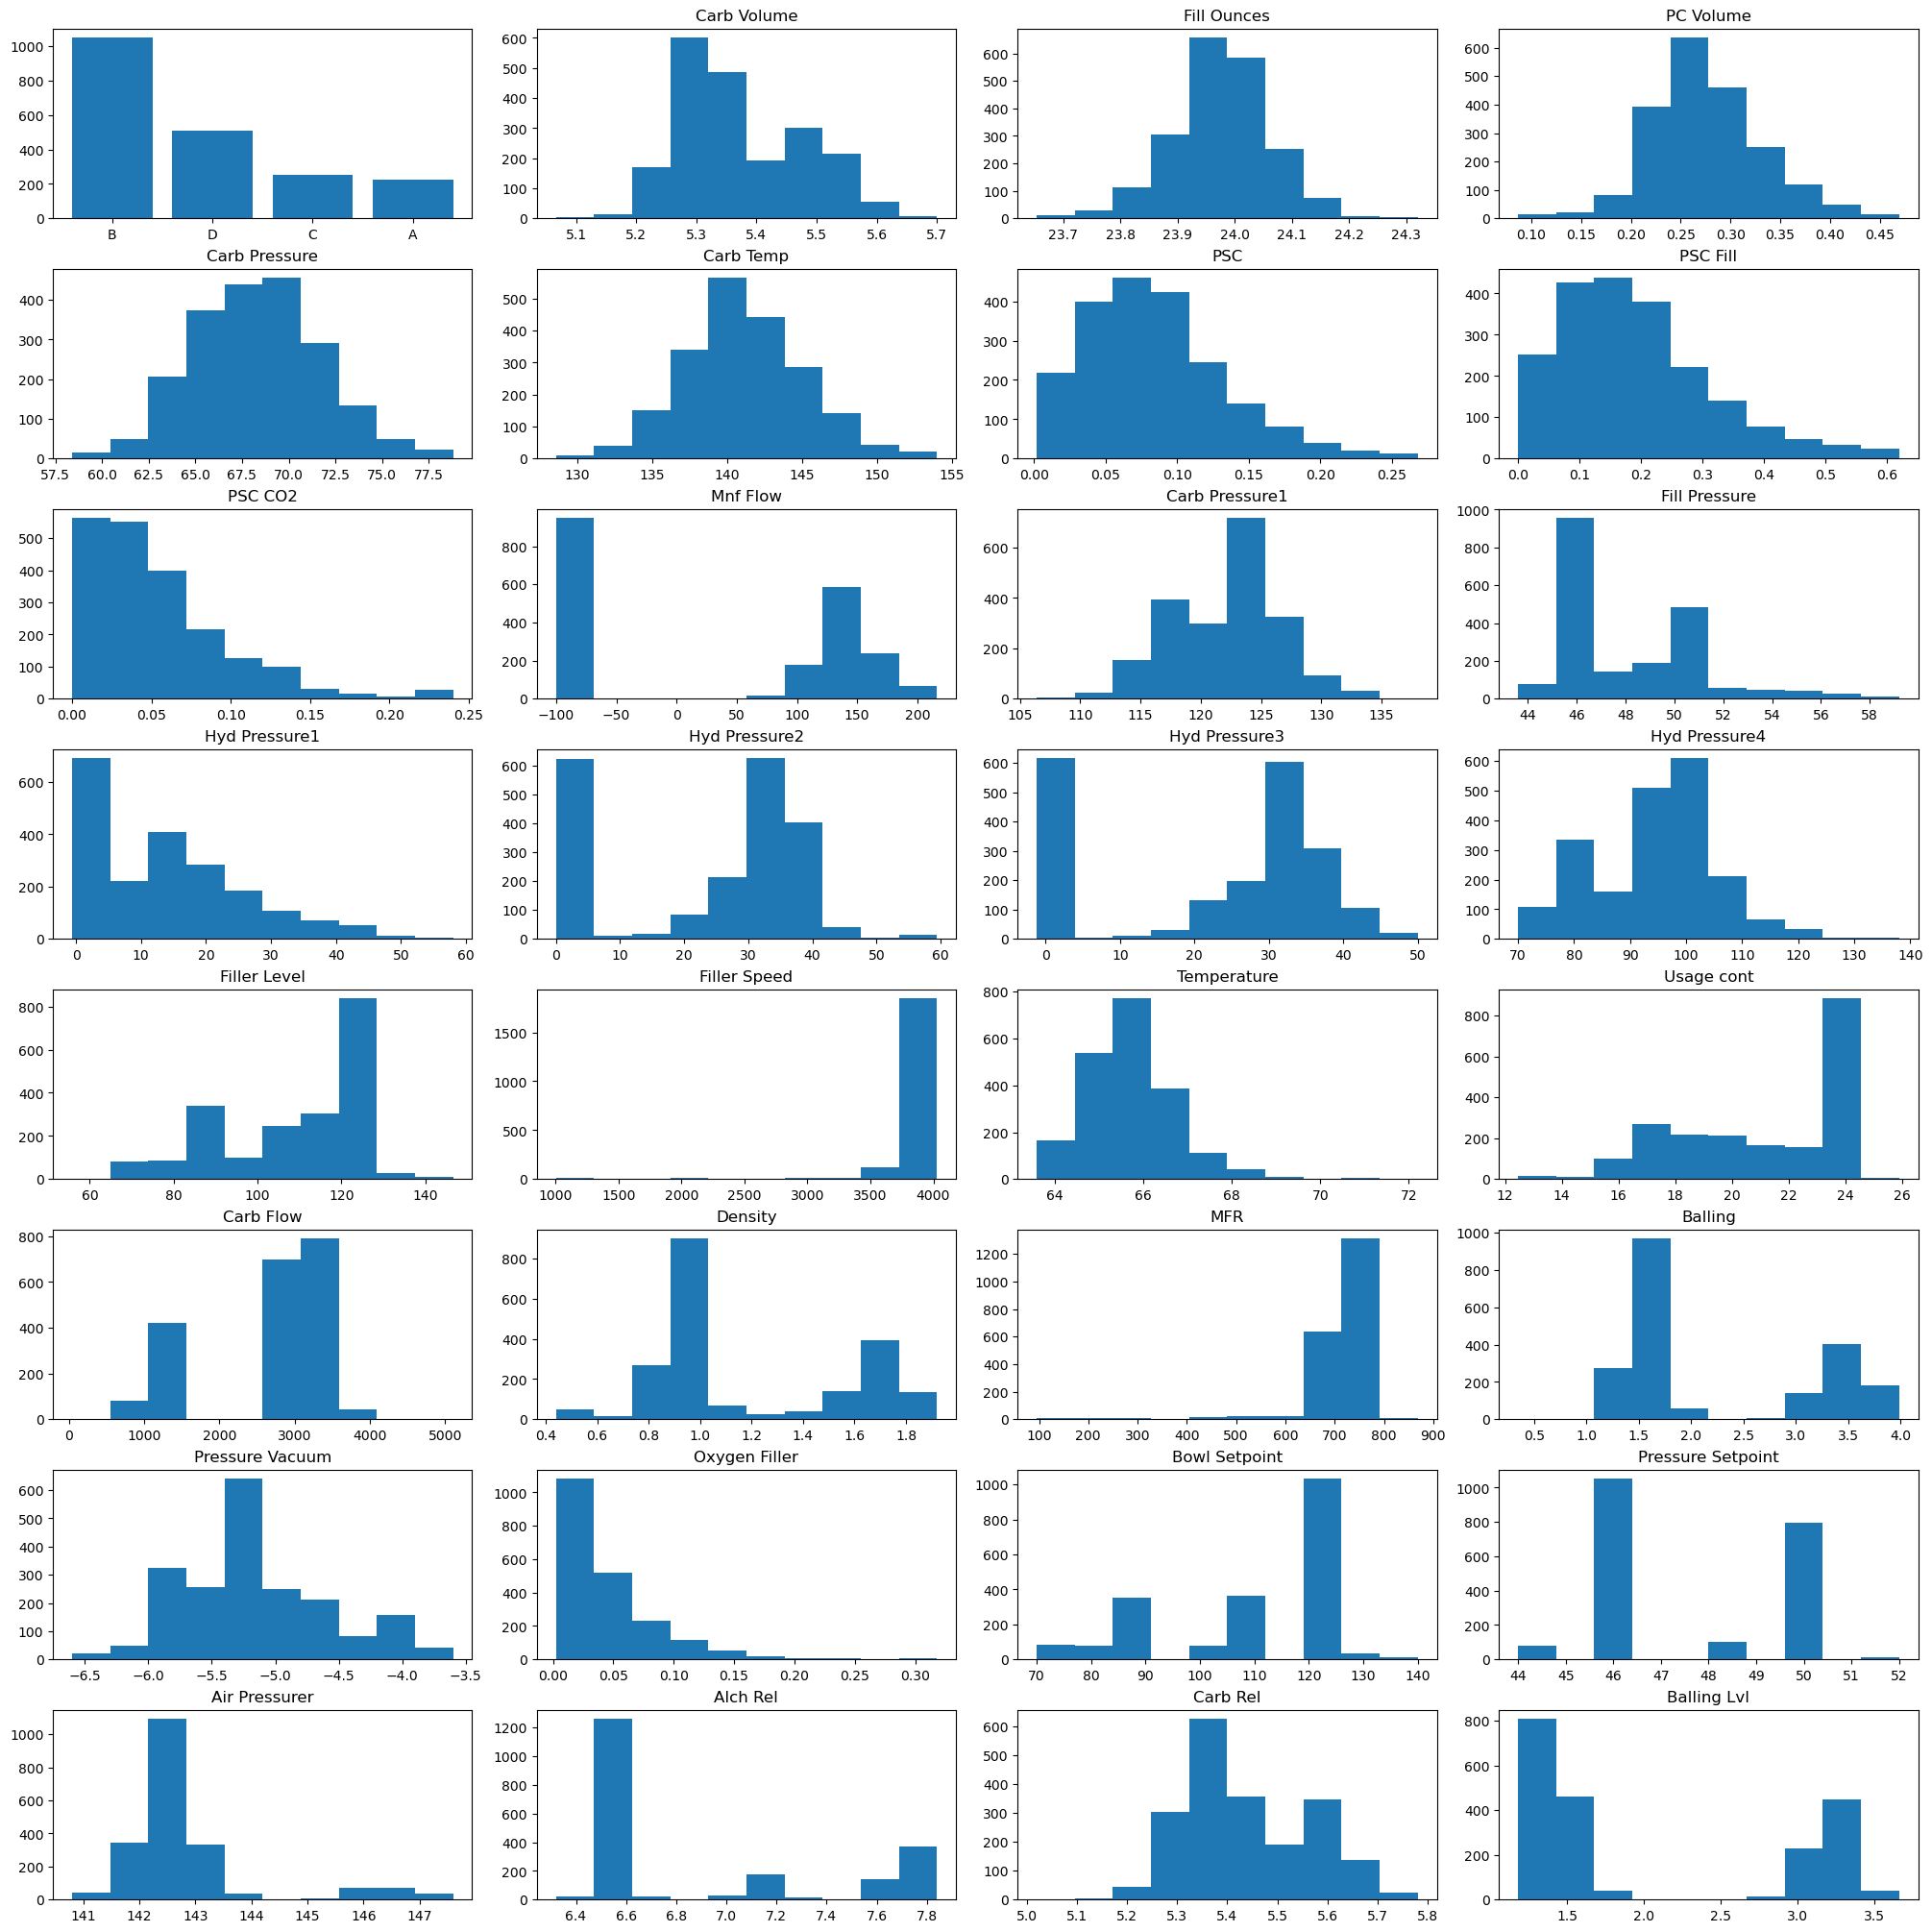

In [10]:
fig, axes = plt.subplots(8, 4, figsize = (20,20), constrained_layout = True)

for col, ax in zip(X, axes.ravel()):
    if X[col].dtype != 'float64':
        ax.bar(X[col].value_counts().index, X[col].value_counts().values)
    else:
        ax.hist(X[col])
        ax.set_title(col)

plt.show()

In [ ]:
fig, axes = plt.subplots(8, 4, figsize = (20,20), constrained_layout = True)

for col, ax in zip(X, axes.ravel()):
    if X[col].dtype != 'float64':
        ax.bar(X[col].value_counts().index, X[col].value_counts().values)
    else:
        ax.scatter(X[col], y)
        ax.set_title(col)

plt.show()

C:\Users\Keith\AppData\Local\Temp\ipykernel_15424\1674288610.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(abs(X.corr()), ax = ax)


<Axes: >

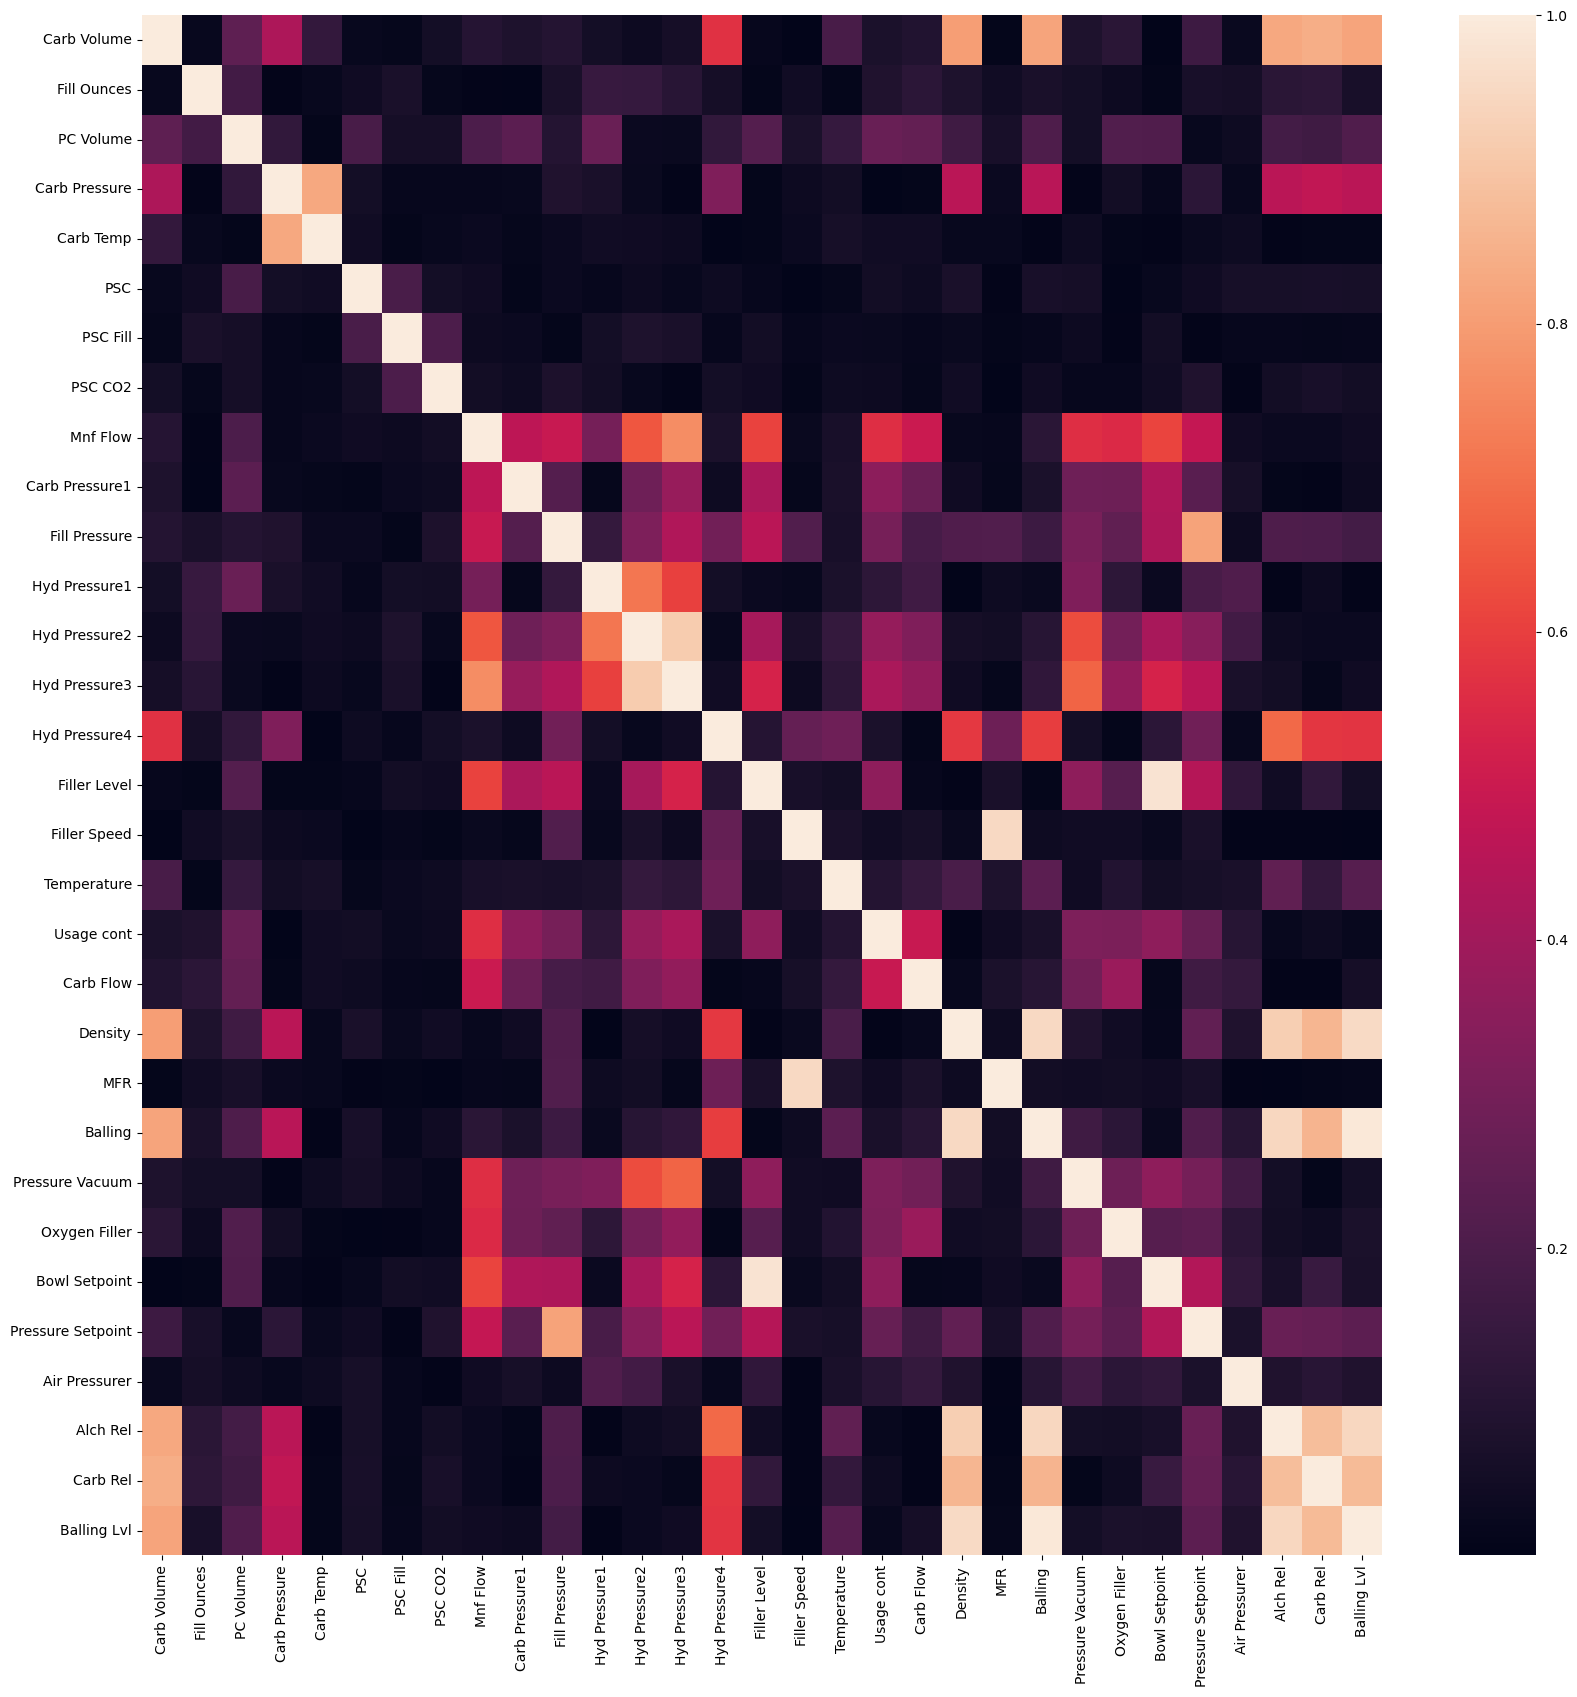

In [11]:
fig, ax = plt.subplots(figsize=(20,20))       
sns.heatmap(abs(X.corr()), ax = ax)

In [12]:
X = (X
     .merge(pd.get_dummies(X['Brand Code'], prefix = 'BrandCode'), 
            left_index = True,
            right_index = True)
     .drop('Brand Code', axis = 1)
    )

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7)

In [14]:
X_train

,Carb Volume,Fill Ounces,PC Volume,Carb Pressure,Carb Temp,PSC,PSC Fill,PSC CO2,Mnf Flow,Carb Pressure1,...,Bowl Setpoint,Pressure Setpoint,Air Pressurer,Alch Rel,Carb Rel,Balling Lvl,BrandCode_A,BrandCode_B,BrandCode_C,BrandCode_D
522,5.506667,23.980000,0.211333,76.6,148.4,0.098,0.20,0.02,-100.0,119.0,...,120.0,50.0,143.2,7.72,5.60,3.32,0,0,0,1
73,5.353333,23.986667,0.317333,70.2,143.6,0.066,0.22,0.04,-100.0,119.0,...,120.0,46.0,145.8,6.56,5.38,1.48,0,1,0,0
537,5.346667,23.960000,0.256000,65.6,138.2,0.038,0.08,0.04,-100.2,126.8,...,120.0,46.0,143.0,6.52,5.40,1.44,0,1,0,0
413,5.500000,23.986667,0.240667,68.6,138.0,0.050,0.22,0.04,-100.2,131.0,...,120.0,46.0,141.8,7.74,5.64,3.24,0,0,0,1
1973,5.593333,24.020000,0.184667,70.0,138.0,0.070,0.08,0.02,143.4,125.6,...,90.0,46.0,143.0,7.14,5.58,3.12,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,5.326667,24.066667,0.191333,70.2,144.4,0.040,0.16,0.02,-100.0,119.2,...,120.0,46.0,141.8,6.52,5.36,1.44,0,1,0,0
2254,5.446667,23.960000,0.220000,69.6,141.0,0.096,0.16,0.04,156.6,131.8,...,110.0,44.0,143.8,7.10,5.56,3.24,1,0,0,0
600,5.333333,23.980000,0.263333,69.6,143.6,0.062,0.12,0.02,-100.2,119.0,...,120.0,46.0,142.8,6.52,5.40,1.48,0,1,0,0
1274,5.253333,23.886667,0.322000,66.2,141.0,0.090,0.32,0.02,193.2,114.6,...,120.0,46.0,141.6,6.58,5.26,1.30,0,1,0,0


In [15]:
y_train.dropna(how = 'any')

522     8.64
73      8.72
537     8.70
413     8.66
1973    8.26
        ... 
316     8.64
2254    8.60
600     8.84
1274    8.56
617     8.60
Name: PH, Length: 611, dtype: float64

## OLS
CS, NZV, Corr

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.012075704164877347


In [26]:
model.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

## PLS
CS

In [17]:
model = PLSRegression(n_components = 5)
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.012529301349842066


### Ridge
CS, NZV

In [18]:
model = Ridge(alpha = 1.0)
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.012094079776862107


## LASSO
CS, NZV

In [19]:
model = linear_model.Lasso(alpha = 0.1)
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.013503325753122696


## SVM
CS

In [20]:
model = SVR(C = 1.0, epsilon = 0.2)
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.014551759814608257


## Neural Network - MLP
CS, NZV, Corr

In [21]:
model = MLPRegressor(alpha = 0.00001, max_iter = 500, random_state = 42)
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.226171160293862


## KNN
CS, NZV

In [22]:
model = KNeighborsRegressor(n_neighbors = 4)
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.012323378195156076


## Single Tree
None

In [23]:
model = DecisionTreeRegressor(random_state = 42)
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.014509225942873403


## Random Forest
None

In [24]:
model = RandomForestRegressor(max_depth = 4,
                              random_state = 42)
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.011816465030980758


## Gradient Boosting
None

In [25]:
model = GradientBoostingRegressor(random_state = 42)
model.fit(X_train, y_train)
print(f'MAPE: {mean_absolute_percentage_error(y_test, model.predict(X_test))}')

MAPE: 0.010722668348239331
